In [6]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('seaborn-whitegrid')
import pandas
from math import pi

## Matched sample

In [7]:
filepath = r'D:/BG/Data/Processing/4_data.txt'
data = pandas.read_csv(filepath, sep='\t')
print(data.shape[0],'postings in full sample')
mylist = []
occupations = ['Managers','Engineers','Technicians','Operators']
for o in occupations:
  df = data[(data[o]==1) & (data.occupation==o)]
  mylist.append(df)
matched=pandas.concat(mylist,axis=0)
print(matched.shape[0],'postings in matched sample')

3091485 postings in full sample
160943 postings in matched sample


## Means

In [8]:
mydf = matched.copy()
measures = ['Engineering Skills','Job Complexity','General Skills','Operations Skills']
mydf['Engineering Skills'] = mydf['research']+mydf['design']+mydf['materials']+mydf['development']
mydf['Operations Skills'] = mydf['tools']+mydf['inventory']+mydf['production']
mydf['General Skills'] = mydf['cognitive']+mydf['social']
mydf['Job Complexity'] = mydf['complexity']
mydf = mydf[['plant','occupation','TECH'] + measures]
mymean = mydf.groupby(by=['plant','occupation','TECH']).mean()
mean_mymean = mymean.groupby(by=['occupation','TECH']).mean().reindex(['Managers','Engineers','Technicians','Operators'],axis=0,level=0)
mean_mymean.rename(index={'Managers':'Manager','Engineers':'Engineer','Technicians':'Technician','Operators':'Operator'},inplace=True)
mean_mymean.reset_index(inplace=True)
df = mean_mymean.copy()
df

,occupation,TECH,Engineering Skills,Job Complexity,General Skills,Operations Skills
0,Manager,AM,1.163389,2.701618,2.717528,0.423405
1,Manager,TM,0.491261,2.396595,2.530647,0.263479
2,Engineer,AM,2.732339,3.294030,2.559582,0.610383
3,Engineer,TM,1.612913,2.724417,2.337531,0.310834
4,Technician,AM,1.351841,1.863464,2.206799,0.967243
5,Technician,TM,0.850793,1.448994,1.626929,0.779127
6,Operator,AM,0.819129,1.505258,1.911100,0.894772
7,Operator,TM,0.406324,1.085281,1.471742,1.057693


[0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]


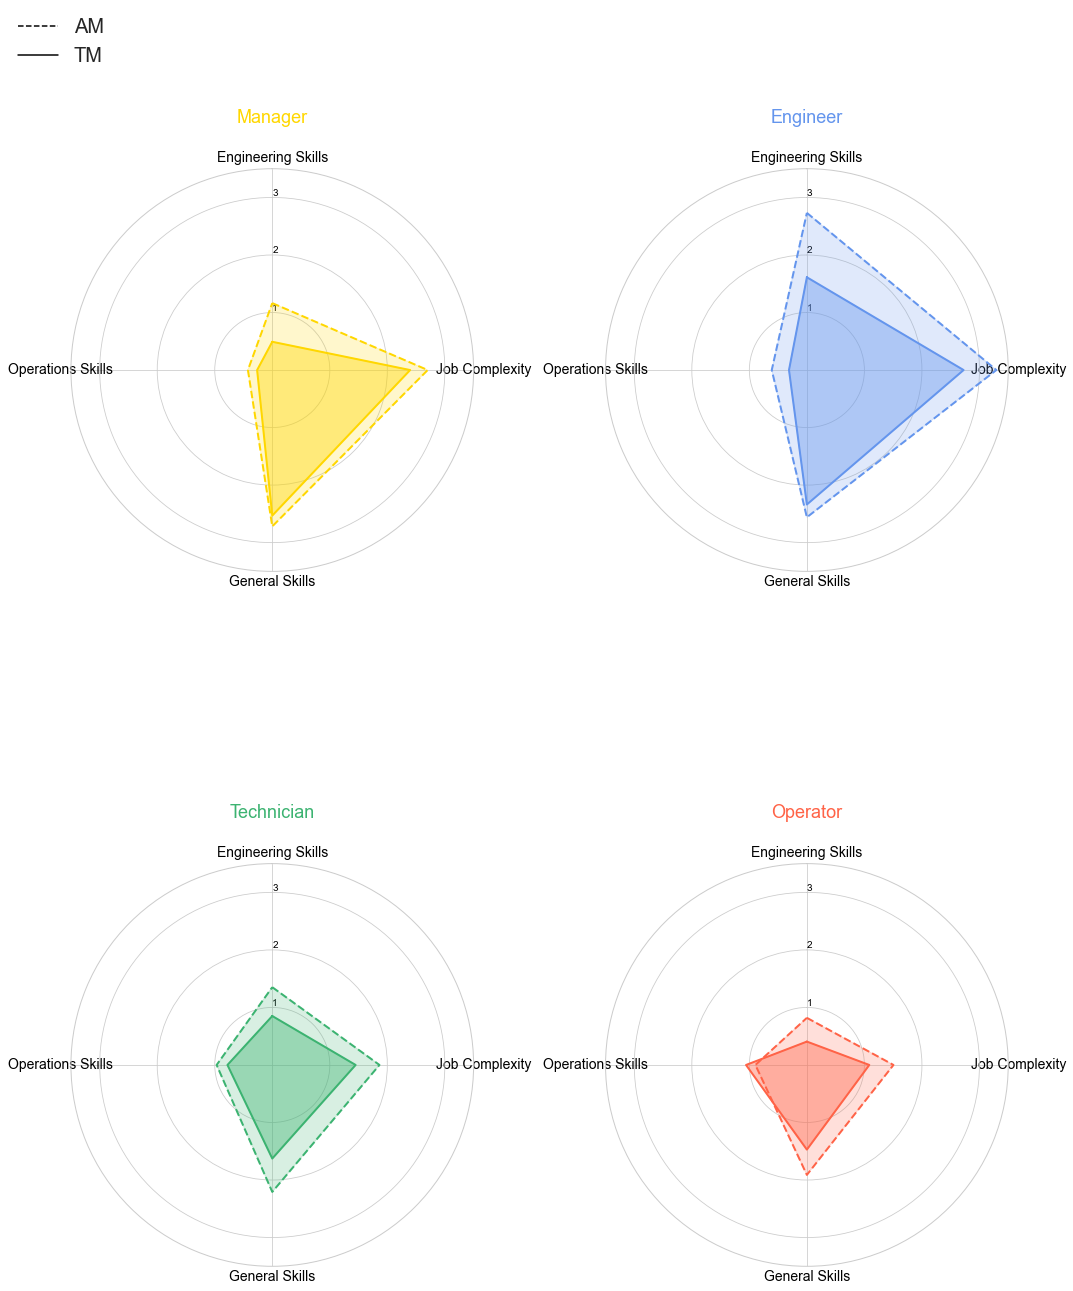

In [10]:
fig = plt.figure(figsize=(15,20))
mycolors = ['gold','cornflowerblue','mediumseagreen','tomato']
categories=list(df)[2:]
N = len(categories)
angles = [n/float(N)*2*pi for n in range(N)]
angles += angles[:1]
print(angles)
for i,row in enumerate(range(0,len(df.index),2)):
  ax = plt.subplot(2,2,i+1,polar=True)
  ax.set_theta_offset(pi/2)
  ax.set_theta_direction(-1)
  plt.xticks(angles[:-1],categories,color='black',size=14)
  ax.set_rlabel_position(0)
  plt.yticks([1,2,3],[1,2,3],color="black",size=10)
  plt.ylim(0,3.5)
  values=df.loc[row].drop(['occupation','TECH']).values.flatten().tolist()
  values += values[:1]
  ax.plot(angles,values,color=mycolors[i],linewidth=2,linestyle='dashed')
  ax.fill(angles,values,color=mycolors[i],alpha=0.2)
  values=df.loc[row+1].drop(['occupation','TECH']).values.flatten().tolist()
  values += values[:1]
  ax.plot(angles,values,color=mycolors[i],linewidth=2,linestyle='solid')
  ax.fill(angles,values,color=mycolors[i],alpha=0.4)
  plt.title(df['occupation'][row],size=18,color=mycolors[i],y=1.1)

legend_elements = [Line2D([0],[0],color='black',linestyle='--',label='AM'),
                   Line2D([0],[0],color='black',linestyle='-',label='TM')]
fig.legend(handles=legend_elements,loc='upper left',fontsize=20) 
fig.tight_layout()
fig.savefig('Figure0_spider.svg',dpi=100)
plt.show()